In [9]:
import numpy as np
from pathlib import Path
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [10]:

dir1="./seg_train/seg_train/"
dir2="./seg_test/seg_test/"
dir3="./seg_pred/seg_pred/"
labels=os.listdir(dir1)
label_dict1={}
label_dict2={}

for i,j in enumerate(labels):
    label_dict1[i]=j
for i,j in enumerate(labels):
    label_dict2[j]=i
def imgPath(dir):
    a=[i for i in Path(dir).rglob("*.jpg")]
    return a
def loadImg(path):
    x=[]
    label=[]
    
        
    for i in tqdm(range(len(path))):
        path1=".\\"+str(path[i])
        
        img=cv2.imread(path1)
        
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(100,100))
        img=img/255
        x.append(img)
        label.append(label_dict2[path1.split("\\")[-2]])
    x=np.array(x).reshape(-1,100,100,1)
    label=to_categorical(label)
    return x,np.array(label)

    



In [11]:
x,label=loadImg(imgPath(dir1))
x_test,label_test=loadImg(imgPath(dir2))

100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 1618.12it/s]


In [84]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=13,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.4, # Randomly zoom image 
        width_shift_range=0.6,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.7,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

In [57]:
def model1():
    model=Sequential()
    model.add(Conv2D(64,(3,3),padding="valid",strides=(3,3),input_shape=(100,100,1),activation="relu"))
    model.add(MaxPooling2D((2,2),padding="same"))
    model.add(Conv2D(128,(3,3),padding="same",strides=(3,3),activation="relu"))
    model.add(MaxPooling2D((2,2),padding="same"))
    model.add(Dropout(0.4))
    model.add(Conv2D(256,(3,3),padding="same",strides=(3,3),activation="relu"))
    model.add(MaxPooling2D((2,2),padding="same"))
    model.add(Dropout(0.5))    
    model.add(Conv2D(512,(3,3),padding="same",strides=(3,3),activation="relu")) 
    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=regularizers.l2(0.001),activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1024,kernel_regularizer=regularizers.l2(0.001),activation="relu"))
    model.add(Dense(6,activation="softmax"))
    return model
              

In [58]:
model2=model1()


In [59]:
model2.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [60]:
model2.fit(datagen.flow(x,label,batch_size=128,shuffle=True),batch_size=128,epochs=42,verbose=True,shuffle=True,validation_data=(datagen.flow(x_test,label_test,batch_size=128,shuffle=True)))

Epoch 1/42
110/110 [==============================] - 18s 115ms/step - loss: 1.8673 - accuracy: 0.3178 - val_loss: 1.3728 - val_accuracy: 0.4417
Epoch 2/42
110/110 [==============================] - 12s 113ms/step - loss: 1.3078 - accuracy: 0.4853 - val_loss: 1.1445 - val_accuracy: 0.5573
Epoch 3/42
110/110 [==============================] - 12s 110ms/step - loss: 1.1837 - accuracy: 0.5379 - val_loss: 1.0878 - val_accuracy: 0.5877
Epoch 4/42
110/110 [==============================] - 12s 109ms/step - loss: 1.1424 - accuracy: 0.5559 - val_loss: 1.0445 - val_accuracy: 0.6003
Epoch 5/42
110/110 [==============================] - 12s 110ms/step - loss: 1.0937 - accuracy: 0.5751 - val_loss: 1.0384 - val_accuracy: 0.5973
Epoch 6/42
110/110 [==============================] - 12s 112ms/step - loss: 1.0730 - accuracy: 0.5871 - val_loss: 0.9953 - val_accuracy: 0.6267
Epoch 7/42
110/110 [==============================] - 13s 114ms/step - loss: 1.0613 - accuracy: 0.5858 - val_loss: 1.0121 - val_ac

In [61]:
history=model2.history.history

In [62]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

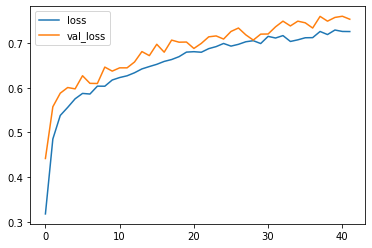

In [63]:
val_loss=history["val_loss"]
val_accuracy=history["val_accuracy"]
loss=history["loss"]
accuracy=history["accuracy"]
plt.plot(accuracy,label="loss")

plt.plot(val_accuracy,label="val_loss")
plt.legend()

In [64]:
def loadImgTest(path):
    x=[]
        
    for i in tqdm(range(len(path))):
        path1=".\\"+str(path[i])
        
        img=cv2.imread(path1)
        
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(100,100))
        img=img/255
        x.append(img)
    x=np.array(x).reshape(-1,100,100,1)
    return x
x=loadImgTest(imgPath(dir2))


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:04<00:00, 686.03it/s]


In [69]:
def urlImage():
    from PIL import Image
    import requests
    from io import BytesIO

    response = requests.get("https://www.chicago.gov/content/dam/city/depts/bldgs/icons/downtown.png")
    img = Image.open(BytesIO(response.content))
    img=np.array(img)
    img=cv2.resize(img,(200,200))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=img/255
    img=np.array(img).reshape(-1,200,200,1)
    return img
    

test=urlImage()


In [79]:
pred=model2.predict(x,verbose=1,batch_size=256)


12/12 [==============================] - 0s 22ms/step


Text(0.5, 1.0, 'buildings')

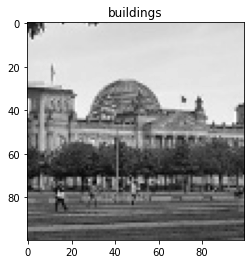

In [83]:

fig,ax=plt.subplots()
plt.imshow(x[199],cmap="gray")
plt.title(label_dict1[pred[199].argmax()])


In [118]:
pred2=model2.predict(datagen.flow(x_test,shuffle=False,batch_size=128,seed=42),verbose=1)

24/24 [==============================] - 2s 92ms/step


In [123]:
preds=[]
y_label=[]
for i in tqdm(range(len(pred2))):
    preds.append(pred2[i].argmax())
    y_label.append(label_test[i].argmax())    

100%|██████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 499917.04it/s]


In [126]:
from sklearn.metrics import confusion_matrix as cm
cm(y_label,preds)

array([[219,  19,  25,  14,  56, 104],
       [102, 287,   7,   3,  22,  53],
       [ 61,  25, 194,  46, 174,  53],
       [ 40,  49, 119, 127, 136,  54],
       [ 61,  22,  65,  43, 270,  49],
       [228,  19,  17,   9,  52, 176]], dtype=int64)